In [120]:
import numpy as np;
import sympy as sym;
import matplotlib.pyplot as plt;
import matplotlib_inline.backend_inline 

matplotlib_inline.backend_inline .set_matplotlib_formats('svg')

lim <sub> phi -> 0 </sub> $ [  sin(phi)/phi ] = 1  $   </br>

lim <sub> phi -> 0 </sub> $ [ (cos(phi)-1)/phi ] = 0$

In [121]:
phi = sym.var('phi')

Fx = (sym.sin(phi)/phi)
Gx = (sym.cos(phi)-1)/phi
target = 0

lim_sin = sym.limit(Fx,phi,target,dir='+-')

lim_cos = sym.limit(Gx,phi,target,dir='+-')


print(f"lim phi -> 0   [sin(phi)/phi]     = {lim_sin} ")
print(f"lim phi -> 0   [(cos(phi)-1)/phi] = {lim_cos}")



lim phi -> 0   [sin(phi)/phi]     = 1 
lim phi -> 0   [(cos(phi)-1)/phi] = 0


-----

# Finding Limits of complicated trig functions using the squeeze theorem

$ f\left(x\right)=\ x^{2}\sin\left(\frac{1}{x}\right) $

$ g\left(x\right)\ =\ x^{2} $

$ h\left(x\right)\ =\ -x^{2} $

$ lim_{x-->0} f(x) $ = ?


-------

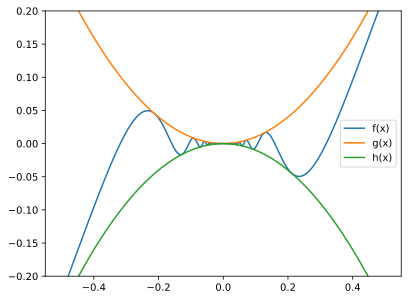

In [122]:
def fx(x):
    return (x**2)*np.sin(1/x);

def gx(x):
    return x**2;

def hx(x):
    return -x**2;


xDomain = [-0.5,+0.5]
yDomain = [-0.2,+0.2]
xx = np.linspace(xDomain[0],xDomain[1],6000)

plt.ylim(yDomain[0],yDomain[1])
plt.plot(xx,fx(xx),label="f(x)")
plt.plot(xx,gx(xx),label="g(x)")
plt.plot(xx,hx(xx),label="h(x)")
plt.legend()
plt.show()

-----

To find the limit $\lim_{x \to 0} x^2 \sin\left(\frac{1}{x}\right)$ using the Squeeze Theorem, we can follow these steps:

1. **Identify the bounds**:
   We know that for any value $y$, $-1 \leq \sin(y) \leq 1$.

   Applying this to our function, we get:
   $
   -1 \leq \sin\left(\frac{1}{x}\right) \leq 1
   $

2. **Multiply by $x^2$**:
   Multiplying all parts of the inequality by $x^2$ (which is always non-negative for real $x$), we get:
   $
   -x^2 \leq x^2 \sin\left(\frac{1}{x}\right) \leq x^2
   $

3. **Consider the limits of the bounds**:
   As $x$ approaches 0, both $x^2$ and $-x^2$ approach 0. Hence, we have:
   $
   \lim_{x \to 0} -x^2 = 0 \quad \text{and} \quad \lim_{x \to 0} x^2 = 0
   $

4. **Apply the Squeeze Theorem**:
   Since $-x^2 \leq x^2 \sin\left(\frac{1}{x}\right) \leq x^2$ and both $-x^2$ and $x^2$ approach 0 as $x$ approaches 0, by the Squeeze Theorem, we can conclude that:
   $
   \lim_{x \to 0} x^2 \sin\left(\frac{1}{x}\right) = 0
   $

So, the limit is:
$
\boxed{0}
$

----

-----



## Implement and plot f(x) in sympy 

$ f\left(x\right)\ =\ \frac{\sin\left(x\right)}{x} $

solve for $ lim_{x->\infty}  f(x) $ NOTE: Solve this by using squeez theorem

-----

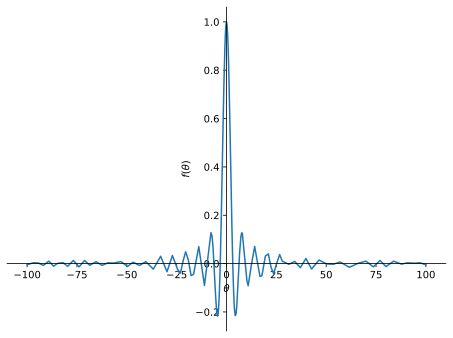

In [123]:
theta = sym.symbols('theta')


fx = sym.sin(theta)/theta;
gx = -(1/theta)

hx = 1/theta

sym.plot(fx,(theta,-100,+100),label=f"{sym.latex(fx)}")


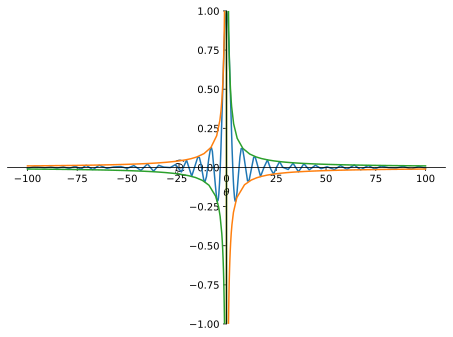

In [124]:
sym.plot(fx,gx,hx,(theta,-100,+100),ylim=(-1, 1))


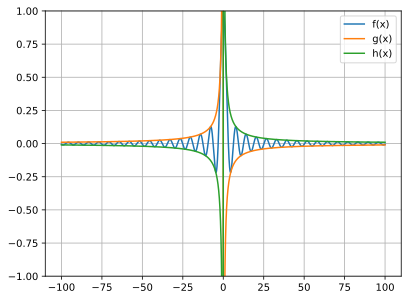

In [125]:
f = sym.lambdify(theta,fx)
g = sym.lambdify(theta,gx)
h = sym.lambdify(theta,hx)


xx = np.linspace(-100,+100,6000);
plt.ylim(-1,+1)

plt.plot(xx,f(xx),label=f"f(x)")
plt.plot(xx,g(xx),label="g(x)")
plt.plot(xx,h(xx),label="h(x)")
plt.grid(True)
plt.legend()
plt.show()

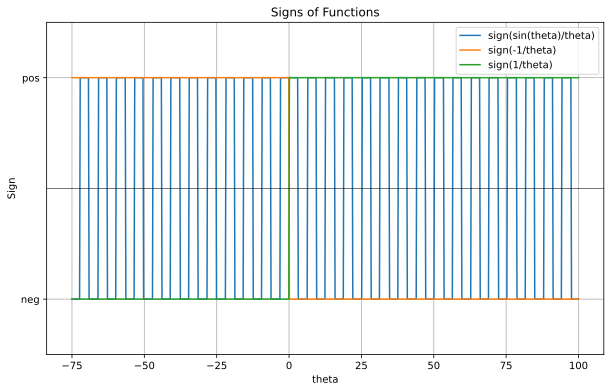

In [144]:
theta_vals = np.linspace(-75, 100, 800)  
# Evaluate the sign of each function
sign_fx = np.sign([fx.subs(theta, val).evalf() for val in theta_vals])
sign_gx = np.sign([gx.subs(theta, val).evalf() for val in theta_vals])
sign_hx = np.sign([hx.subs(theta, val).evalf() for val in theta_vals])

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(theta_vals, sign_fx, label='sign(sin(theta)/theta)')
plt.plot(theta_vals, sign_gx, label='sign(-1/theta)')
plt.plot(theta_vals, sign_hx, label='sign(1/theta)')

plt.xlabel('theta')
plt.ylabel('Sign')
plt.title('Signs of Functions')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.yticks([-1,+1],['neg','pos'])  # Adjust ylim to fit the sign values (-1, 0, 1)
plt.axhline(0, color='black', linewidth=0.5)  # Horizontal line at y=0 for reference

plt.show()

In [137]:
lim_fx = sym.limit(fx,theta,sym.oo)

lim_gx  = sym.limit(gx,theta,sym.oo)

lim_hx  = sym.limit(hx,theta,sym.oo)
print(f"The limit of {fx} as theta approaches infinity is {lim_fx}")
print(f"The limit of {gx} as theta approaches infinity is {lim_gx}")
print(f"The limit of {hx} as theta approaches infinity is {lim_hx}")

The limit of sin(theta)/theta as theta approaches infinity is 0
The limit of -1/theta as theta approaches infinity is 0
The limit of 1/theta as theta approaches infinity is 0


-----

## Excercise no2 

$ f\left(\theta\right)\ =\ \frac{\tan\left(\theta\right)}{\theta} $



$ g\left(\theta\right)\ =\ \frac{\sin\left(\theta\right)}{\theta} $


$ h\left(\theta\right)\ \ =\ \frac{1}{\cos\left(\theta\right)} $


$ f\left(\theta\right)\ =\ h\left(\theta\right)g\left(\theta\right) $

<h4> Solve for </h4> 

$ lim_{\theta -> 0} f(\theta) $

-------

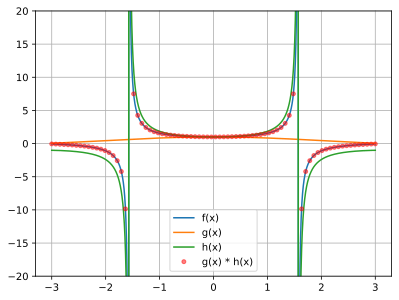

In [182]:
f_theta = sym.tan(theta)/theta;

g_theta = sym.sin(theta)/theta;

h_theta = 1/sym.cos(theta)

g_h_theta = g_theta*h_theta


fx = sym.lambdify(theta,f_theta,modules='numpy')
gx = sym.lambdify(theta,g_theta)
hx = sym.lambdify(theta,h_theta)
gh_x = sym.lambdify(theta,g_h_theta)

xx = np.linspace(-3,+3,6000)

theta_vals = np.linspace(-3,+3,80)
plt.ylim(-20,+20)
plt.plot(xx,fx(xx),label=f"f(x)")
plt.plot(xx,gx(xx),label="g(x)")
plt.plot(xx,hx(xx),label="h(x)")


plt.plot(theta_vals, gh_x(theta_vals), 'ro', markersize=4, label='g(x) * h(x)', alpha=0.5)

plt.grid(True)
plt.legend()
plt.show()



## Computing the function values at $ \theta $ = 0

In [186]:
fx_value = fx(0)

gx_value = gx(0)

hx_value = hx(0);

# Print the evaluated values
print(f"The value of f(theta) at theta = 0 is: {fx_value}")
print(f"The value of g(theta) at theta = 0 is: {gx_value}")
print(f"The value of h(theta) at theta = 0 is: {hx_value}")


The value of f(theta) at theta = 0 is: nan
The value of g(theta) at theta = 0 is: nan
The value of h(theta) at theta = 0 is: 1.0


<lambdifygenerated-145>:2: RuntimeWarning: invalid value encountered in scalar divide
  return tan(theta)/theta
<lambdifygenerated-146>:2: RuntimeWarning: invalid value encountered in scalar divide
  return sin(theta)/theta


In [189]:
lim_ftheta = sym.limit(f_theta,theta,0)

lim_gtheta = sym.limit(g_theta,theta,0)

lim_htheta = sym.limit(h_theta,theta,0)


print(f"The limit of f(theta) as theta approaches 0 is: {lim_ftheta}")
print(f"The limit of g(theta) as theta approaches 0 is: {lim_gtheta}")
print(f"The limit of h(theta) as theta approaches 0 is: {lim_htheta}")

The limit of f(theta) as theta approaches 0 is: 1
The limit of g(theta) as theta approaches 0 is: 1
The limit of h(theta) as theta approaches 0 is: 1
